### Sanity check of the RF multipole module of pysixtrack, used as CC.

Compare the induced closed orbit from the RFmuiltipole running by running a simulation in pysixtrack

To represent a vertical CC with the RFMultipole we implement it as a skew dipole.

For the comparison with the theoretical prediction the standard CC kick is used, as given below:

\begin{equation}
\Delta p_y = \frac{V_{CC}}{Ε_0} \sin(\phi_s + k z), 
\end{equation}
where $V_{CC}$ the CC voltage in [V], E_0 the beam energy in [eV], $\phi_s$ the phase of the CC, k the wavenumber and z the longitudinal coordinate.

In [2]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Plotting parameters
params = {'legend.fontsize': 25,
          'figure.figsize': (12.5, 10.5),
          'axes.labelsize': 25,
          'axes.titlesize': 25,
          'xtick.labelsize': 25,
          'ytick.labelsize': 25,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 8,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### Study parameters

In [4]:
E_0 = 26e9 # total energy of the reference particle [eV]
clight = 299792458 # speed of light [m/s]

#### Crab cavity parameters

In [5]:
V_CC = 3e6 # V
f_CC = 400e6 # Hz
ps = 0# 90.  # phase of the cavity

In [6]:
k = 2 * np.pi * f_CC / clight # wavenumber of the cavity

#### Create a longitudinal distribution
- Just evenly spaced values within a given integral

In [7]:
n_particles = 1000.
start, stop = -0.6, 0.6
step = (stop-start)/n_particles
initial_sigmas = np.arange(start, stop, step)

#### Lattice parameters

In [8]:
beta_y = 27.46384921 # start of the lattice
beta_y_CC1 =  76.07315729 # CC1
Qy = 26.18
muy = + 4.05373914#3.134818627 # maybe 20.25- 3..

#### Transverse kick from the CC
- we consider sigma = z [m]
- if you want the exact correlation, see "rf_multipole_vs_standard_crab_cavity.ipynb"

In [9]:
delta_py_CC = V_CC * np.sin(ps + k * np.array(initial_sigmas))/E_0

In [10]:
y_co_CC = (np.sqrt(beta_y*beta_y_CC1)) * np.array(delta_py_CC)*np.cos(2*np.pi*muy - np.pi*Qy)/ (2*np.sin(np.pi*Qy)) 

#### Load the tbt data from the simulation


In [14]:
df_1 =  pd.read_pickle('/afs/cern.ch/work/n/natriant/private/pysixtrack_example_crabcavity/output/tbt.pkl') 

#### Plot the induced closed orbit

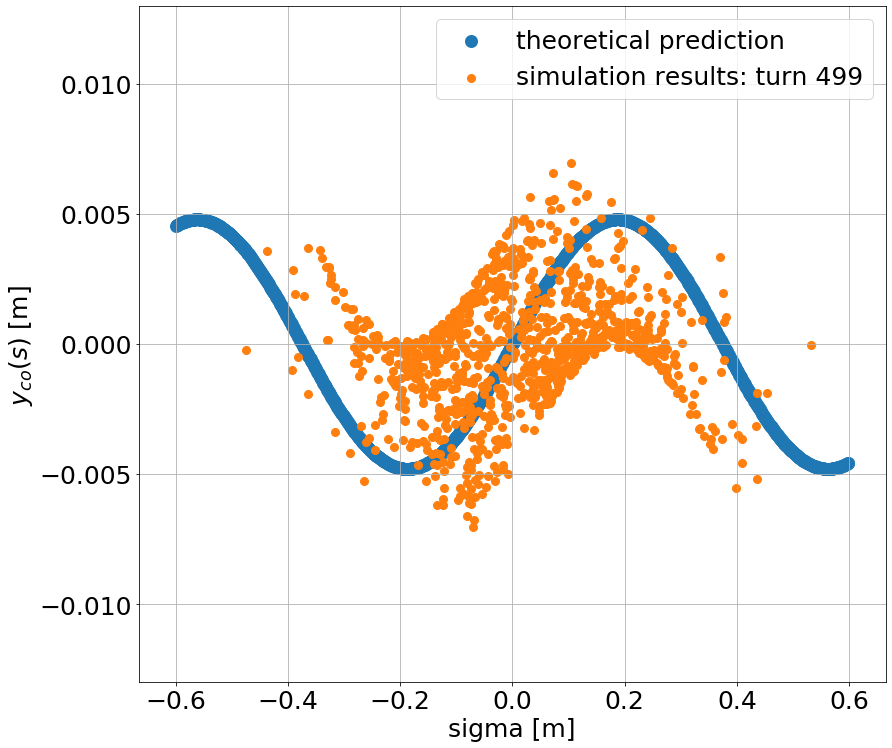

In [29]:
plt.scatter(initial_sigmas, y_co_CC, label = 'theoretical prediction', linewidth = 5)
plt.scatter(df_1['sigma'][499], df_1['y'][499], label ='simulation results: turn 499')
plt.xlabel('sigma [m]')
plt.ylabel(r'$y_{co}(s)$ [m] ')
plt.grid()
plt.legend()
plt.tight_layout()
#plt.savefig('./closed_orbit_distortion_VCC3MV_norump_fCC00Mhz_ps90_26GeV_sps.png')

#### Plot the rms bunch length over turns
- If the distribution is matched it should not change